In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#select the necessary features.
1.  categorical ---> encoding (one hot encoding if less uniques)
2. numerical ---> scaling (std or min-max depending on dist)

In [4]:
cat_cols = ['loan', 'default', 'housing', 'job', 'education', 'contact', 'poutcome']

In [5]:
df_encoded = pd.get_dummies(df[cat_cols], drop_first = True).astype(int)

In [6]:
df_encoded.shape

(41188, 27)

In [7]:
df['age'].skew()

np.float64(0.7846968157646645)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_age = scaler.fit_transform(df[['age']])
df_age

array([[ 1.53303429],
       [ 1.62899323],
       [-0.29018564],
       ...,
       [ 1.53303429],
       [ 0.38152696],
       [ 3.26029527]])

In [9]:
df_age = pd.DataFrame(df_age, columns = ['age'])

In [10]:
df_age.head()

,age
0,1.533034
1,1.628993
2,-0.290186
3,-0.002309
4,1.533034


In [11]:
df_final = pd.concat([df_encoded, df_age], axis=1)

In [12]:
df_final.head()

,loan_unknown,loan_yes,default_unknown,default_yes,housing_unknown,housing_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,poutcome_nonexistent,poutcome_success,age
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1.533034
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1.628993
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,-0.290186
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,-0.002309
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,1.533034


In [13]:
X = df_final.values #except columns and indices, take all the values.

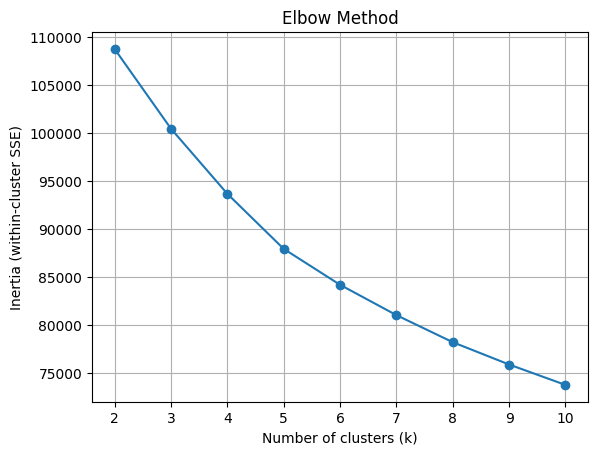

In [14]:
K_range = list(range(2, 11))
inertia = []

# for each number of clusters, fit X and store the resulting in the inertia list.
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xticks(K_range)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (within-cluster SSE)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [33]:
optimal_clusters = 5
#define the kmeans requirements
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
#copy the original dataset and add the last columns Cluster which has the cluster number where each row belongs to.
df_clusters = df.copy()
df_clusters['Cluster'] = kmeans.fit_predict(X)

In [34]:
from sklearn.metrics import silhouette_score

'''
~0.5 = good structure
~0.3 = fair, usable
<0.2 = weak separation
'''
labels = kmeans.labels_

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score for k=5: {sil_score:.3f}")

Silhouette Score for k=5: 0.166


In [35]:
from sklearn.metrics import davies_bouldin_score

'''
closer to 0 = well seperated
'''

db_score = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index for k=5: {db_score:.3f}")

Davies-Bouldin Index for k=5: 1.906


In [16]:
print(df_clusters['Cluster'].value_counts())

Cluster
4    10848
2     9677
1     8752
0     7670
3     4241
Name: count, dtype: int64


In [17]:
for col in cat_cols:
  print(df_clusters.groupby('Cluster')[col].value_counts(normalize=True))

Cluster  loan   
0        no         0.822947
         yes        0.153977
         unknown    0.023077
1        no         0.828725
         yes        0.145795
         unknown    0.025480
2        no         0.817609
         yes        0.159864
         unknown    0.022528
3        no         0.827399
         yes        0.149021
         unknown    0.023579
4        no         0.826327
         yes        0.148599
         unknown    0.025074
Name: proportion, dtype: float64
Cluster  default
0        no         0.868057
         unknown    0.131812
         yes        0.000130
1        no         0.670361
         unknown    0.329639
2        no         0.912060
         unknown    0.087940
3        no         0.889413
         unknown    0.110116
         yes        0.000472
4        no         0.688145
         unknown    0.311855
Name: proportion, dtype: float64
Cluster  housing
0        yes        0.518644
         no         0.458279
         unknown    0.023077
1        yes 

In [18]:
df_clusters.groupby('Cluster')['age'].mean().reset_index()

,Cluster,age
0,0,33.952151
1,1,36.546389
2,2,34.222900
3,3,35.901203
4,4,53.909661
